In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
"""
Prepping data from the given dataset -> Extracting it into attribute titles and the raw data.
"""
def read_data(f_name):
    raw_dataset = []
    with open(f_name) as f_i:
        attributes = f_i.readline().strip(',').strip().split(',')

        for line in f_i:
            temp = np.array(line.strip().split(','), dtype = float)
            # float_temp = temp.astype(float)
            raw_dataset.append(np.array(temp[1:]))

        return np.array(attributes), np.array(raw_dataset)

In [4]:
attri_name, raw_data = read_data("Salary_dataset.csv")
rows = raw_data.shape[0]
print(attri_name)
print(raw_data.shape)
print(rows)

['YearsExperience' 'Salary']
(30, 2)
30


In [5]:
def extract_data(raw_data):
    years_ex, salary = raw_data[:,0], raw_data[:,1]
    return years_ex, salary


In [7]:
def compute_cost(w, b, experience, salary):
    """ 
    experience <- x
    salary <- y
    """
    m = experience.shape[0]
    cost = 0

    for i in range(rows):
        cost += (w * experience[i] + b - salary[i]) ** 2

    return cost / (2 * m)

In [20]:
def compute_gradient(w, b, experience, salary):
    m = experience.shape[0]

    dj_db, dj_dw = 0, 0
    for i in range(m):
        dj_db += (w * experience[i] + b - salary[i])
        dj_dw += (w * experience[i] + b - salary[i]) * experience[i]

    dj_db /= m
    dj_dw /= m

    return dj_dw, dj_db

In [37]:
import math
def gradient_descent(experience, salary, w_in, b_in, alpha, num_iters):
    J_history = []
    p_history = []
    w, b = w_in, b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, experience, salary)
        w, b = w - alpha * dj_dw, b - alpha * dj_db

        J_history.append(compute_cost(w, b, experience, salary))
        p_history.append([w, b])
    
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                f"w: {w: 0.3e}, b:{b: 0.5e}")
    

    return w, b, J_history, p_history

In [96]:
''' 
Testing
'''
def plot(experience, salary, slope, intercept, normalized = True):
    data = pd.DataFrame({"salary": salary, "experience" : experience }) 
    lower_years, upper_years = min(experience) * 90 / 100, max(experience) * 115 / 100
    lower_salary, upper_salary = min(salary) * 90 / 100, max(salary) * 115 / 100

    # Plot the line

    x_values = np.linspace(0, upper_years, 100) 

    y_values = slope * x_values + intercept


    plt.plot(x_values, y_values, label=f'y = {slope}x + {intercept}')
    plt.scatter(data.experience, data.salary, color = 'orange', label = 'data points')
    plt.xlim(0, upper_years)
    plt.ylim(0, upper_salary)
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

In [48]:
def normalize_data(experience, salary):
    mean_ex, var_ex = np.mean(experience), np.var(experience)
    mean_sa, var_sa = np.mean(salary), np.var(salary)

    return (experience - mean_ex) / var_ex ** 0.5, (salary - mean_sa) / var_sa ** 0.5

Iteration    0: Cost 2.61e+09  dj_dw: -4.850e+05, dj_db: -7.600e+04   w:  2.425e+04, b: 3.80020e+03
Iteration 1000: Cost 1.56e+07  dj_dw:  2.265e-02, dj_db: -1.543e-01   w:  9.450e+03, b: 2.48475e+04
Iteration 2000: Cost 1.56e+07  dj_dw:  7.405e-07, dj_db: -5.046e-06   w:  9.450e+03, b: 2.48482e+04
Iteration 3000: Cost 1.56e+07  dj_dw:  2.328e-11, dj_db: -1.654e-10   w:  9.450e+03, b: 2.48482e+04
Iteration 4000: Cost 1.56e+07  dj_dw: -2.935e-11, dj_db: -3.420e-11   w:  9.450e+03, b: 2.48482e+04
Iteration 5000: Cost 1.56e+07  dj_dw: -2.935e-11, dj_db: -3.420e-11   w:  9.450e+03, b: 2.48482e+04
Iteration 6000: Cost 1.56e+07  dj_dw: -2.935e-11, dj_db: -3.420e-11   w:  9.450e+03, b: 2.48482e+04
Iteration 7000: Cost 1.56e+07  dj_dw: -2.935e-11, dj_db: -3.420e-11   w:  9.450e+03, b: 2.48482e+04
Iteration 8000: Cost 1.56e+07  dj_dw: -2.935e-11, dj_db: -3.420e-11   w:  9.450e+03, b: 2.48482e+04
Iteration 9000: Cost 1.56e+07  dj_dw: -2.935e-11, dj_db: -3.420e-11   w:  9.450e+03, b: 2.48482e+04


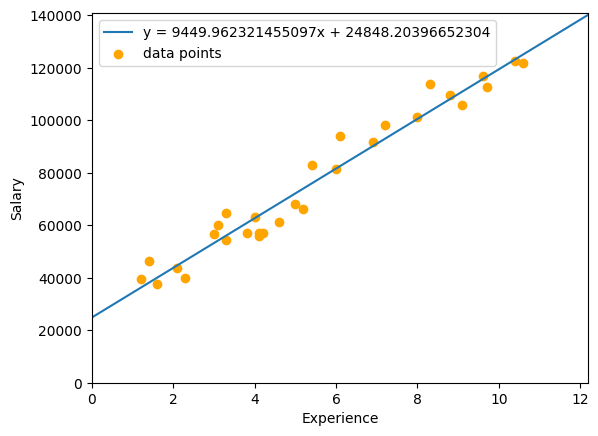

In [97]:
w_in, b_in = 0, 0
num_iters = 10000
alpha = 0.05

experience, salary = extract_data(raw_data)

w, b, J_history, p_history = gradient_descent(experience, salary,
                                              w_in, b_in, alpha, num_iters)

print(w,b)
plot(experience, salary, w, b,)